# Unsupervised Learning (K-Mean Algorythm)

In [1]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data
import numpy as np                  # numpy provides N-dim object support
import math
from scipy import misc

# do ploting inline instead of in a separate window
%matplotlib inline

In [2]:
%reload_ext version_information
%version_information numpy, scipy, matplotlib

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 16.4.0 x86_64 i386 64bit
numpy 1.11.1
scipy 0.18.1
matplotlib 1.5.3
Mon Feb 20 10:51:01 2017 EET

In [3]:
data = pd.read_csv('./data/data-for-clustering.txt', header=None)
data.head(5)

,0,1
0,1.84208,4.60757
1,5.65858,4.79996
2,6.35258,3.29085
3,2.90402,4.61220
4,3.23198,4.93989


In [4]:
data.tail(5)

,0,1
295,7.30279,3.38016
296,6.99198,2.98707
297,4.82553,2.77962
298,6.11768,2.85476
299,0.94049,5.71557


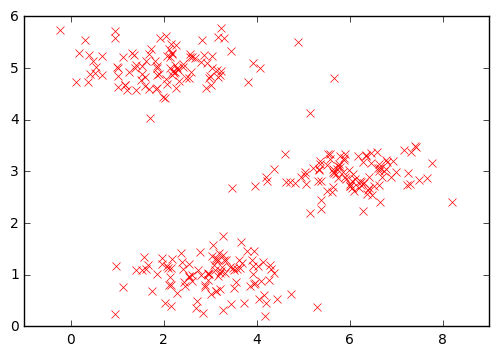

In [5]:
plt.figure()
plt.plot(data[0].values, data[1].values, 'rx')
plt.show()

In [6]:
def computeCentroids(X, idx, K):
    n = X.shape[1]
    centroids = np.zeros((K, n))
    idx = np.array([idx])
    np.where(X == 2, 1, 0)
    for i in range(K):
        idx_bin = np.where(idx == i, 1, 0)
        centroids[i, :] = (np.dot(X.T, idx_bin)).T / np.sum(idx_bin)
    
    return centroids

In [7]:
def findClosestCentroids(X, centroids):
    m = X.shape[0]
    K = centroids.shape[0]
    idx = [0] * m
    
    for i in range(m):
        min_norm = np.sum((X[i, :] - centroids[0, :])**2)
        idx[i] = 0; 
        for j in range(K):
            next_norm = np.sum((X[i, :].T - centroids[j, :].T)**2)
            if next_norm < min_norm:
                idx[i] = j;
                min_norm = next_norm;
                
    return np.array([idx]).T

In [8]:
def runkMeans(X, initial_centroids, max_iters):
    centroids = initial_centroids
    K = initial_centroids.shape[0]
    for i in range(1, max_iters + 1):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K);
        
    return centroids, idx

In [9]:
def initCentroids(X, K):
    m = X.shape[0]
    rand_indexes = np.random.choice(m, m - K, False)

    return np.delete(X, rand_indexes, axis=0)

In [10]:
def findDistortion(X, centroids, idx):
    m = X.shape[0]
    centr_matrix = np.zeros(X.shape)
    for i in range(m):
        centr_matrix[i, :] = centroids[idx[i], :]
    
    return np.sum(np.subtract(X, centr_matrix) ** 2) / m

def findClusters(X, K, max_iters, num_random_inits):
    best_distortion = math.inf
    for i in range(num_random_inits):
        initial_centroids = initCentroids(np.array(X), K)
        centroids, idx = runkMeans(np.array(X), initial_centroids, 100)
        distortion = findDistortion(X, centroids, idx)
        if distortion < best_distortion:
            best_distortion = distortion
            best_centroids = centroids
            best_idx = idx
    
    return best_centroids, best_idx

In [11]:
result_centroids, result_idx = findClusters(np.array(data), 3, 100, 50)

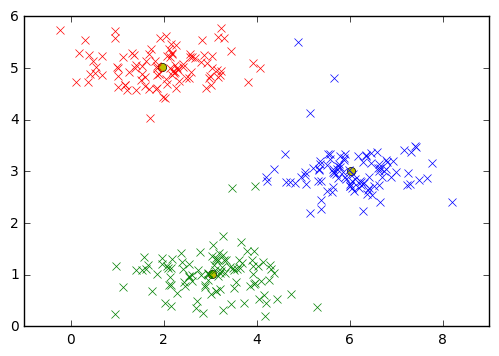

In [12]:
def selectClusterEntries(X, idx, k_num):
    result = X
    for i in reversed(range(idx.shape[0])):
        if idx[i, 0] != k_num:
            result = np.delete(result, i, 0)
            
    return result

zero_cluster = selectClusterEntries(np.array(data), result_idx, 0)
first_cluster = selectClusterEntries(np.array(data), result_idx, 1)
second_cluster = selectClusterEntries(np.array(data), result_idx, 2)
            
plt.figure()
plt.plot(result_centroids[:, 0], result_centroids[:, 1], 'yo')
plt.plot(zero_cluster[:, 0], zero_cluster[:, 1], 'rx')
plt.plot(first_cluster[:, 0], first_cluster[:, 1], 'bx')
plt.plot(second_cluster[:, 0], second_cluster[:, 1], 'gx')
plt.show()

# Image Compression

In [25]:
pixels_arr = misc.imread('./data/bird_small.png')

Original image:
![title](data/bird_small.png)

In [27]:
h, w, d = pixels_arr.shape
pixels_arr_res = np.resize(pixels_arr, (h * w, d))

In [29]:
res_centroids, res_idx = findClusters(pixels_arr_res, 16, 10, 1)

In [30]:
res_centroids = np.floor(res_centroids)

In [31]:
def assignPixelsWithCentroids(X, centroids, idx):
    result = np.zeros(X.shape)
    for i in range(X.shape[0]):
        result[i, :] = centroids[idx[i], :]
        
    return result

In [35]:
res_pixels = assignPixelsWithCentroids(pixels_arr_res, res_centroids, res_idx)
res_pixels = np.resize(res_pixels, (128,128, 3))
misc.imsave('data/bird_small_compressed.png', res_pixels)

Compressed image:
![title](data/bird_small_compressed.png)